## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
x_train.shape[0], x_train.shape[-1]

(50000, 3072)

In [0]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 06:24:16.493918 140144072853376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 06:24:16.546754 140144072853376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 06:24:16.555860 140144072853376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 06:24:16.635412 140144072853376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 06:24:16.654235 140144072853376 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 訓練模型並檢視驗證集的結果

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 06:26:14.693349 140144072853376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 06:26:14.761573 140144072853376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.9420 - acc: 0.3006 - val_loss: 1.8009 - val_acc: 0.3509
Epoch 2/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.7241 - acc: 0.3820 - val_loss: 1.6568 - val_acc: 0.4050
Epoch 3/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.6336 - acc: 0.4171 - val_loss: 1.5866 - val_acc: 0.4341
Epoch 4/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.5663 - acc: 0.4417 - val_loss: 1.5888 - val_acc: 0.4362
Epoch 5/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.5126 - acc: 0.4617 - val_loss: 1.5353 - val_acc: 0.4612
Epoch 6/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.4792 - acc: 0.4734 - val_loss: 1.4787 - val_acc: 0.4769
Epoch 7/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.4315 - acc: 0.4887 - val_l

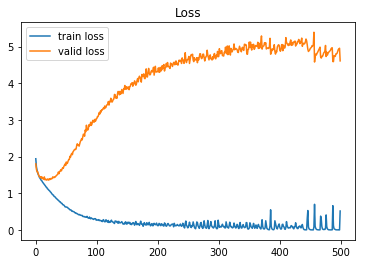

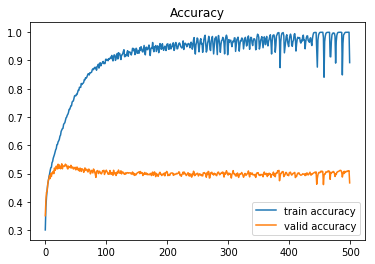

In [11]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [18]:
x_train.shape

(50000, 3072)

In [0]:

# 建立一個有三層隱藏層之神經網路
input_layer = keras.layers.Input([x_train.shape[-1]])
x = keras.layers.Dense(units=512, activation="relu")(input_layer)
x = keras.layers.Dense(units=256, activation="relu")(x)
x = keras.layers.Dense(units=128, activation="relu")(x)
out = keras.layers.Dense(units=10, activation="softmax")(x)
    
model_sge = keras.models.Model(inputs=[input_layer], outputs=[out])


In [34]:
#建成function, 就可以不用定義layer
#model_sgd = c_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model_sgd.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = keras.optimizers.SGD(lr=0.001)
model_sgd.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [36]:
# 訓練模型並檢視驗證集的結果

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0234 - val_acc: 0.5072
Epoch 2/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0239 - val_acc: 0.5070
Epoch 3/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0243 - val_acc: 0.5070
Epoch 4/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0246 - val_acc: 0.5070
Epoch 5/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0250 - val_acc: 0.5070
Epoch 6/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 5.0255 - val_acc: 0.5070
Epoch 7/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.0029 - acc: 1.0000 - val_l

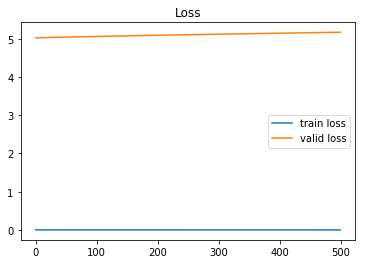

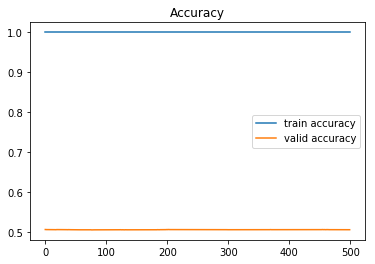

In [37]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss") #用range取幾個點
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()